In [4]:
pip install openpyxl



   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/250.9 kB 1.3 MB/s eta 0:00:01
   --------- ----------------------------- 61.4/250.9 kB 825.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 751.6 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250.9 kB 876.1 kB/s eta 0:00:01
   ------------------------------- ------ 204.8/250.9 kB 888.4 kB/s eta 0:00:01
   ---------------------------------- --- 225.3/250.9 kB 919.0 kB/s eta 0:00:01
   -------------------------------------- 250.9/250.9 kB 771.4 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

# Option 1: Escaping backslashes
file_path = 'C:\\Users\\Sumit\\Desktop\\family\\sumit\\triniy\\01_Excel\\project4\\Statistics.xlsx'

# Option 2: Using a raw string
# file_path = r'C:\Users\Sumit\Desktop\family\sumit\triniy\01_Excel\project4\Statistics.xlsx'

# Load the Excel file to inspect its structure
xls = pd.ExcelFile(file_path)

# Display sheet names and read the first few rows of each sheet to inspect the data
sheet_names = xls.sheet_names
sheet_data = {sheet: xls.parse(sheet).head() for sheet in sheet_names}

sheet_names, sheet_data


(['Sheet1'],
 {'Sheet1':    application_id  Interview Taken on    Status event_name  \
  0          383422 2014-05-01 11:40:49     Hired       Male   
  1          907518 2014-05-06 08:08:32     Hired     Female   
  2          176719 2014-05-06 08:08:54  Rejected       Male   
  3          429799 2014-05-02 16:28:59  Rejected     Female   
  4          253651 2014-05-02 16:32:26     Hired       Male   
  
                Department Post Name  Offered Salary  
  0     Service Department        c8         56553.0  
  1     Service Department        c5         22075.0  
  2     Service Department        c5         70069.0  
  3  Operations Department        i4          3207.0  
  4  Operations Department        i4         29668.0  })

In [6]:
# Load the full sheet data for processing
df = xls.parse('Sheet1')

# Filter only 'Hired' candidates
hired_df = df[df['Status'] == 'Hired']

# A. Gender distribution of hires
gender_distribution = hired_df['event_name'].value_counts()

# B. Average salary of hired candidates
average_salary = hired_df['Offered Salary'].mean()

gender_distribution, average_salary


(event_name
 Male                 2563
 Female               1856
 Don’t want to say     268
 -                      10
 Name: count, dtype: int64,
 49752.896103896106)

In [7]:
# C. Salary distribution: Creating class intervals for the salary distribution
salary_bins = pd.cut(hired_df['Offered Salary'], bins=10)  # Dividing into 10 intervals
salary_distribution = salary_bins.value_counts().sort_index()

# D. Departmental Analysis: Count of employees by department
department_distribution = hired_df['Department'].value_counts()

# E. Position Tier Analysis: Count of employees by job position
position_distribution = hired_df['Post Name'].value_counts()

salary_distribution, department_distribution, position_distribution


(Offered Salary
 (400.8, 40720.0]        1910
 (40720.0, 80640.0]      1943
 (80640.0, 120560.0]      841
 (120560.0, 160480.0]       0
 (160480.0, 200400.0]       1
 (200400.0, 240320.0]       0
 (240320.0, 280240.0]       0
 (280240.0, 320160.0]       1
 (320160.0, 360080.0]       0
 (360080.0, 400000.0]       1
 Name: count, dtype: int64,
 Department
 Operations Department        1843
 Service Department           1332
 Sales Department              485
 Production Department         246
 Purchase Department           230
 Marketing Department          202
 Finance Department            176
 General Management            113
 Human Resource Department      70
 Name: count, dtype: int64,
 Post Name
 c9      1239
 c5      1182
 i7       635
 i5       511
 i6       337
 b9       308
 c8       193
 i1       151
 c-10     105
 i4        32
 m6         2
 -          1
 n6         1
 Name: count, dtype: int64)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\mnt\\data\\department_distribution.png'

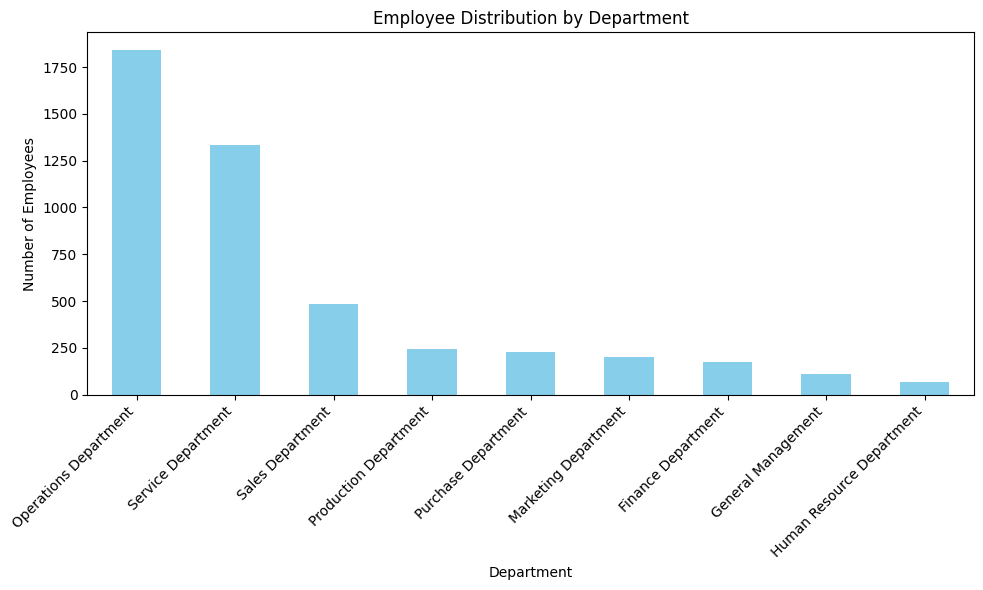

In [10]:
import matplotlib.pyplot as plt

# D. Departmental Analysis: Bar chart for department distribution
plt.figure(figsize=(10, 6))
department_distribution.plot(kind='bar', color='skyblue')
plt.title('Employee Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/mnt/data/department_distribution.png')

# E. Position Tier Analysis: Bar chart for position distribution
plt.figure(figsize=(10, 6))
position_distribution.plot(kind='bar', color='lightgreen')
plt.title('Employee Distribution by Position Tier')
plt.xlabel('Position Tier')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/mnt/data/position_distribution.png')

'/mnt/data/department_distribution.png', '/mnt/data/position_distribution.png'


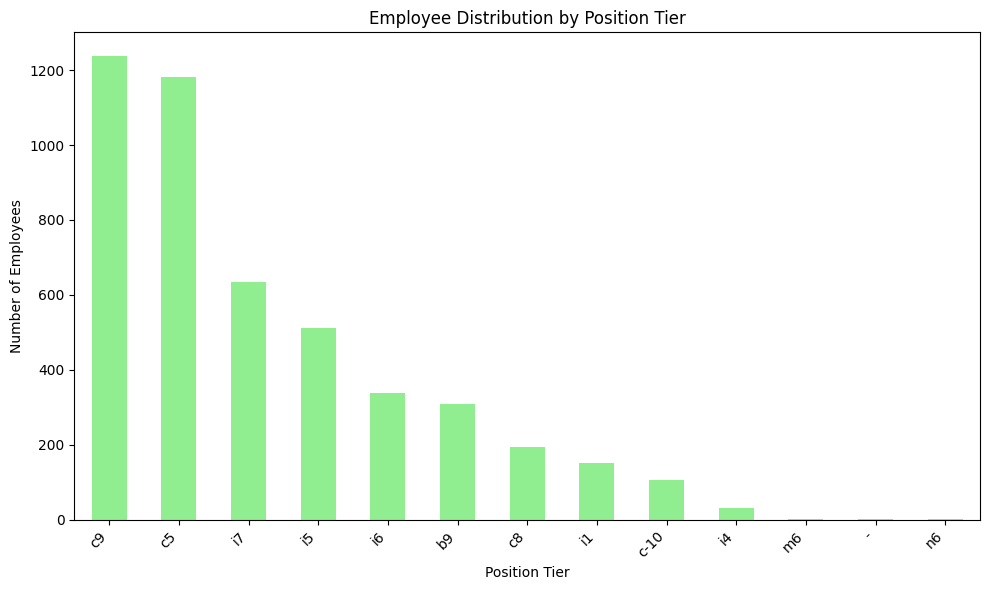

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already loaded the Excel sheet into a DataFrame `df`.
# Filter only the hired employees, as we want to analyze only those who were hired
hired_df = df[df['Status'] == 'Hired']

# E. Position Tier Analysis: Group by 'Post Name' to count the number of employees per tier
position_distribution = hired_df['Post Name'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
position_distribution.plot(kind='bar', color='lightgreen')
plt.title('Employee Distribution by Position Tier')
plt.xlabel('Position Tier')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()
